# Workbook 00 - Solving beams with `PyNite`

In [1]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

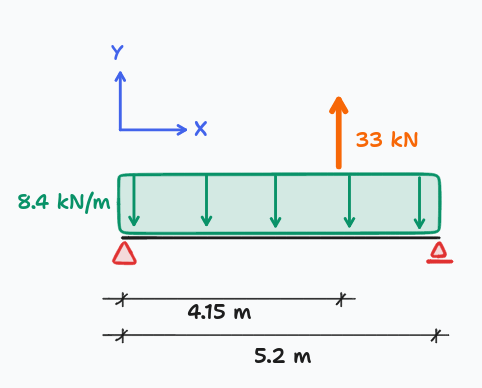

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

Vertical Left Reaction (N):
{'ASCE LC1': 30575.999999999993, 'ASCE LC2': 15546.461538461539}

Vertical Right Reaction (N):
{'ASCE LC1': 30576.0, 'ASCE LC2': -15930.461538461532}


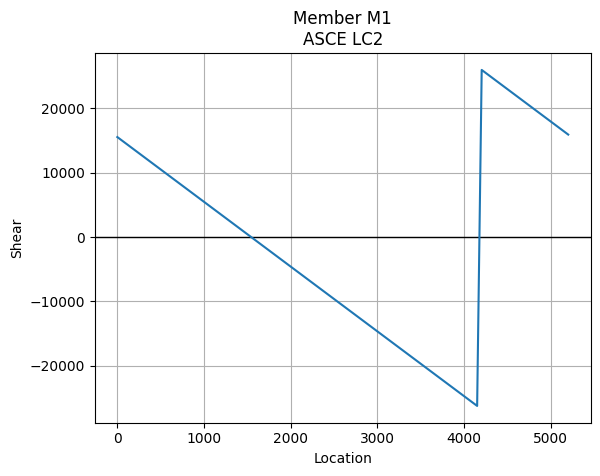

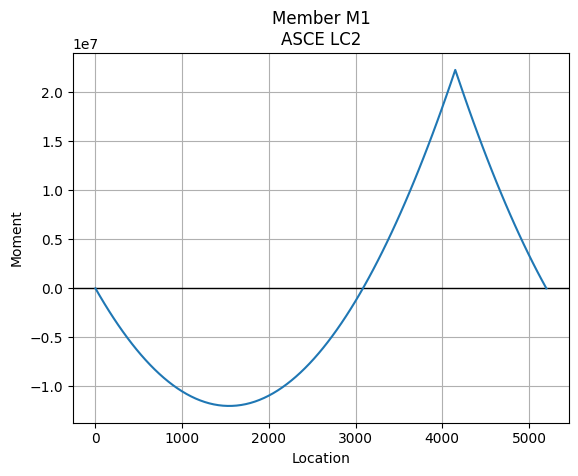

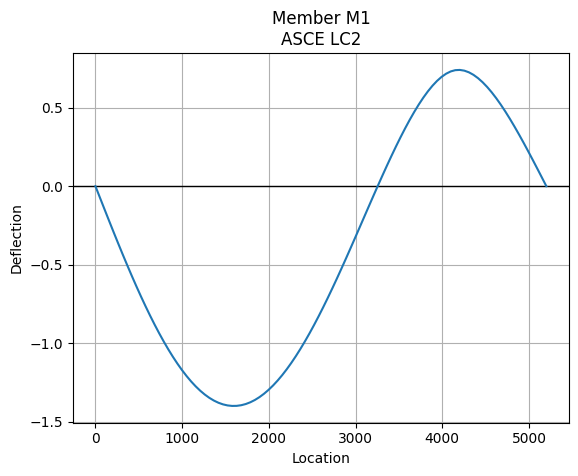

In [20]:
# This is me completing the workbook
from PyNite import FEModel3D
from PyNite.Visualization import render_model

beam_model_1 = FEModel3D()
#Units

mm = 1
m = 1000*mm
N = 1
KN = 1000*N
Pa = N/m**2
KPa = 1000*N/m**2
MPa = 1000*KPa


#Calculation of E and I
b = 300*mm
h = 600*mm
fpc = 45*MPa
ro = 24*KN/m**3

A = b*h
Iz = 400e6*MPa
Iy = 1/12*h*b**3
E = 23000*MPa
G = E/(2*(1+0.3))

sw = -8.4*KN/m
p = 33*KN


beam_model_1.add_node('node1',0.,0.,0.)
beam_model_1.add_node('node2',4.15*m,0.,0.)
beam_model_1.add_node('node3',5.2*m,0.,0.)

beam_model_1.add_member('M1','node1','node3',E,G,Iy,Iz,10e5,A)

beam_model_1.def_support('node1',support_DX=True,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)
beam_model_1.def_support('node3',support_DX=False,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)

beam_model_1.add_load_combo('ASCE LC1',{'D':1.4})
beam_model_1.add_load_combo('ASCE LC2',{'D':1.2,'L':1.6})

beam_model_1.add_member_pt_load('M1','Fy',p, x = 4.15*m,case = 'L')
beam_model_1.add_member_dist_load('M1','Fy',sw,sw,x1 = 0, x2 = 5.2*m,case = 'D')



beam_model_1.analyze()
print('Vertical Left Reaction (N):')
print(beam_model_1.Nodes['node1'].RxnFY)

print('\nVertical Right Reaction (N):')
print(beam_model_1.Nodes['node3'].RxnFY)

beam_model_1.Members['M1'].plot_shear(Direction='Fy',combo_name='ASCE LC2',n_points = 100)
beam_model_1.Members['M1'].plot_moment(Direction='Mz',combo_name='ASCE LC2',n_points = 100)
beam_model_1.Members['M1'].plot_deflection(Direction='dy',combo_name='ASCE LC2',n_points = 100)



render_model(beam_model_1,combo_name='ASCE LC2',annotation_size=75)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

Vertical Reaction (N)
{'ASCE LC1': 21772.799999999996, 'ASCE LC2': 644262.3999999998}

Moment Reaction (N-mm)
{'ASCE LC1': 39191039.99999992, 'ASCE LC2': 1271672319.9999979}


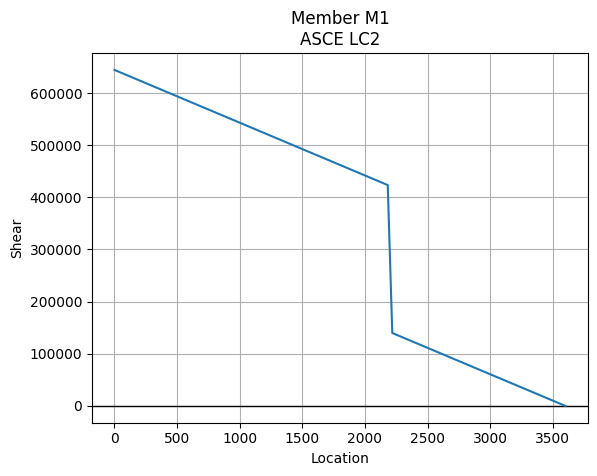

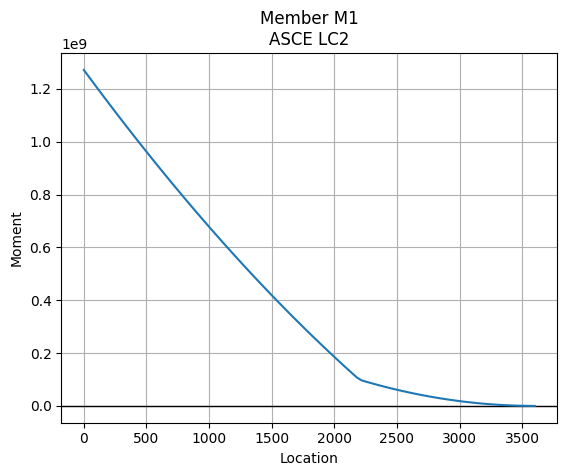

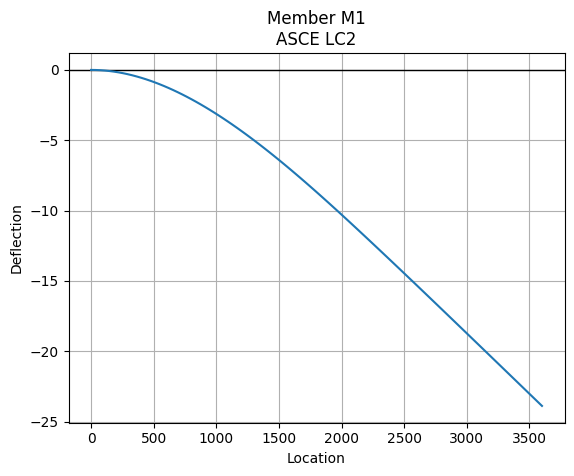

In [17]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

beam_model_2 = FEModel3D()

#Units

mm = 1
m = 1000*mm
N = 1
KN = 1000*N
Pa = N/m**2
KPa = 1000*N/m**2
MPa = 1000*KPa


#Calculation of E and I
b = 300*mm
h = 600*mm
fpc = 45*MPa
ro = 24*KN/m**3

A = b*h
Iz = 1/12*b*h**3
Iy = 1/12*h*b**3
E = 4700*(fpc/MPa)**0.5*MPa
G = E/(2*(1+0.3))

sw = -b*h*ro
ll = -60*KN/m
p = -175*KN


beam_model_2.add_node('node1',0.,0.,0.)
beam_model_2.add_node('node2',2.2*m,0.,0.)
beam_model_2.add_node('node3',3.6*m,0.,0.)

beam_model_2.add_member('M1','node1','node3',E,G,Iy,Iz,10e5,A)

beam_model_2.def_support('node1',support_DX=True,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=True)

beam_model_2.add_load_combo('ASCE LC1',{'D':1.4})
beam_model_2.add_load_combo('ASCE LC2',{'D':1.2,'L':1.6})

beam_model_2.add_member_pt_load('M1','Fy',p, x = 2.2*m,case = 'L')
beam_model_2.add_member_dist_load('M1','Fy',sw,sw,x1 = 0, x2 = 3.6*m,case = 'D')
beam_model_2.add_member_dist_load('M1','Fy',ll,ll,x1 = 0, x2 = 3.6*m,case = 'L')


beam_model_2.analyze()
print('Vertical Reaction (N):')
print(beam_model_2.Nodes['node1'].RxnFY)
print('\nMoment Reaction (N-mm):')
print(beam_model_2.Nodes['node1'].RxnMZ)

beam_model_2.Members['M1'].plot_shear(Direction='Fy',combo_name='ASCE LC2',n_points = 100)
beam_model_2.Members['M1'].plot_moment(Direction='Mz',combo_name='ASCE LC2',n_points = 100)
beam_model_2.Members['M1'].plot_deflection(Direction='dy',combo_name='ASCE LC2',n_points = 100)



render_model(beam_model_2,combo_name='ASCE LC2',annotation_size=75)


# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

Vertical Reaction node 1 (N):
{'Dead': -2452.0260416666665}

Vertical Reaction node 2 (N):
{'Dead': 8927.928240740737}

Vertical Reaction node 3 (N):
{'Dead': 5967.6973379629635}

Vertical Reaction node 4 (N):
{'Dead': -1177.6527777777783}

Vertical Reaction node 5 (N):
{'Dead': 214.05324074074085}


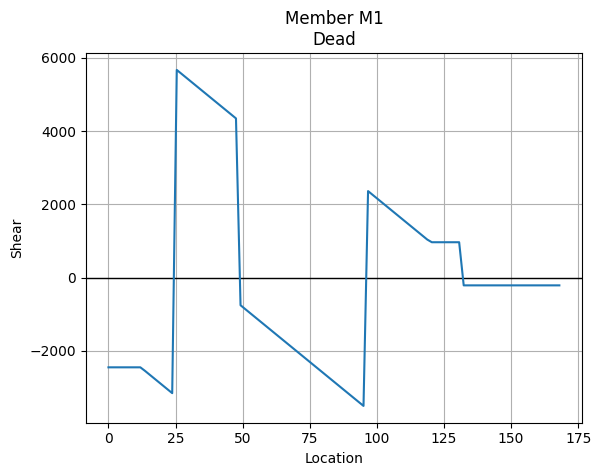

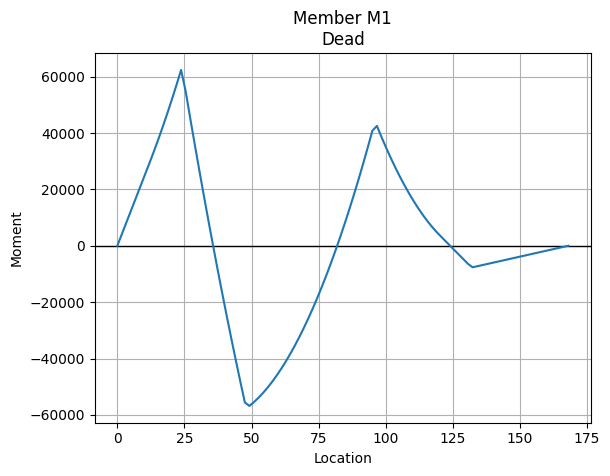

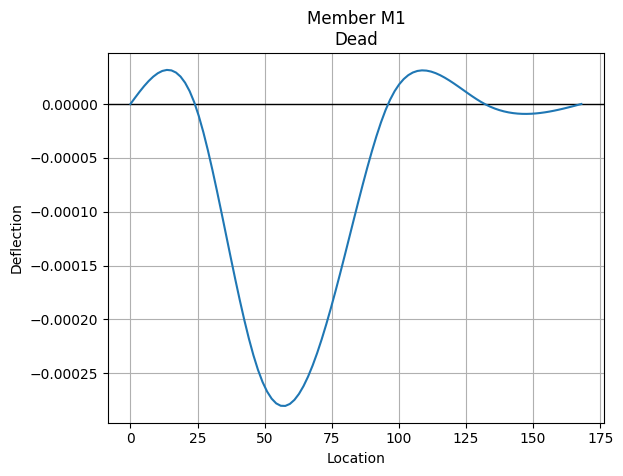

In [24]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

beam_model_3 = FEModel3D()

inch = 1
lb = 1
kip = 1000*lb
ksi = kip/inch**2

p = -5*kip

E = 58e3*ksi
Iz = 1200*inch**4

beam_model_3.add_node('node1',0.,0.,0.)
beam_model_3.add_node('node2',24*inch,0.,0.)
beam_model_3.add_node('node3',96*inch,0.,0.)
beam_model_3.add_node('node4',132*inch,0.,0.)
beam_model_3.add_node('node5',168*inch,0.,0.)
beam_model_3.add_node('node6',48*inch,0.,0.)

beam_model_3.add_member('M1','node1','node5',E,10e5*inch**5,10e5*inch**5,Iz,10e5*inch**4,120*inch**2)
beam_model_3.def_support('node1',support_DX=True,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)
beam_model_3.def_support('node2',support_DX=False,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)
beam_model_3.def_support('node3',support_DX=False,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)
beam_model_3.def_support('node4',support_DX=False,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)
beam_model_3.def_support('node5',support_DX=False,support_DY=True,support_DZ=True,support_RX=True,support_RY=True,support_RZ=False)

beam_model_3.add_load_combo('Dead',{'D':1})

beam_model_3.add_member_pt_load('M1','Fy',p, x = 48*inch,case = 'D')
beam_model_3.add_member_dist_load('M1','Fy',-60*lb/inch, -60*lb/inch,x1 = 12*inch, x2 = 120*inch,case = 'D')


beam_model_3.analyze()
print('Vertical Reaction node 1 (N):')
print(beam_model_3.Nodes['node1'].RxnFY)
print('\nVertical Reaction node 2 (N):')
print(beam_model_3.Nodes['node2'].RxnFY)
print('\nVertical Reaction node 3 (N):')
print(beam_model_3.Nodes['node3'].RxnFY)
print('\nVertical Reaction node 4 (N):')
print(beam_model_3.Nodes['node4'].RxnFY)
print('\nVertical Reaction node 5 (N):')
print(beam_model_3.Nodes['node5'].RxnFY)

beam_model_3.Members['M1'].plot_shear(Direction='Fy',combo_name='Dead',n_points = 100)
beam_model_3.Members['M1'].plot_moment(Direction='Mz',combo_name='Dead',n_points = 100)
beam_model_3.Members['M1'].plot_deflection(Direction='dy',combo_name='Dead',n_points = 100)



render_model(beam_model_3,combo_name='Dead',annotation_size=5)


# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.